In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import supportFunctions as sF

In [40]:
# Read the data from the csv file
data1 = pd.read_csv('DTC_Offset_Ori.csv')
# data2 = pd.read_csv('DTC_Offset_Scaled.csv')

In [41]:
timeValue = np.array([0, 30, 32, 40])

# 4s
x1 = data1['X']
y1 = data1['Y']
z1 = data1['Z']

# find the index where y1 > 0
idx = np.where(y1 > 0)

# delete x1 and z1 at the index where y1 > 0
x1 = np.delete(x1, idx)
y1 = np.delete(y1, idx)
z1 = np.delete(z1, idx)

# 0s and 4s
x0 = x1
y0 = y1
z0 = z1

# 6s
x2 = x1 * 1.05
y2 = y1 * 0.952396
z2 = z1

# 8s
x3 = x2
y3 = y2
z3 = z2

In [42]:
geoPoints0 = np.stack((x0, y0, z0), axis=-1)
geoPoints1 = np.stack((x1, y1, z1), axis=-1)
geoPoints2 = np.stack((x2, y2, z2), axis=-1)
geoPoints3 = np.stack((x3, y3, z3), axis=-1)

# shipPoints.shape = (timePts, numPoints, 3)
shipPoints = np.stack((geoPoints0, geoPoints1, geoPoints2, geoPoints3), axis=0)
print(shipPoints.shape)

(4, 51808, 3)


In [43]:


compData = False
outputPath = "constant/boundaryData/hull"
fileName = "pointDisplacement"

for ii, tV in enumerate(timeValue):
    if ii == 0:
        outPts = shipPoints[ii, :, :]
        motDat = 0*outPts
    else:
        outPts = shipPoints[ii-1, :, :]
        motDat = (shipPoints[ii, :, :] - shipPoints[0, :, :]) # displacement from the initial position

    outDat = motDat

    # Save files
    tVal = tV

    # Save points
    print("     Exporting motion files for time t=%0.4f [s]" % tVal)

    sF.createOpenFOAMfile(data=outPts, fileName="points",
                                time=tVal, folPath=outputPath,
                                compress=compData)
    # Save data
    sF.createOpenFOAMfile(data=outDat, fileName=fileName,
                            time=tVal, folPath=outputPath,
                            compress=compData)


     Exporting motion files for time t=0.0000 [s]
     Exporting motion files for time t=30.0000 [s]
     Exporting motion files for time t=32.0000 [s]
     Exporting motion files for time t=40.0000 [s]


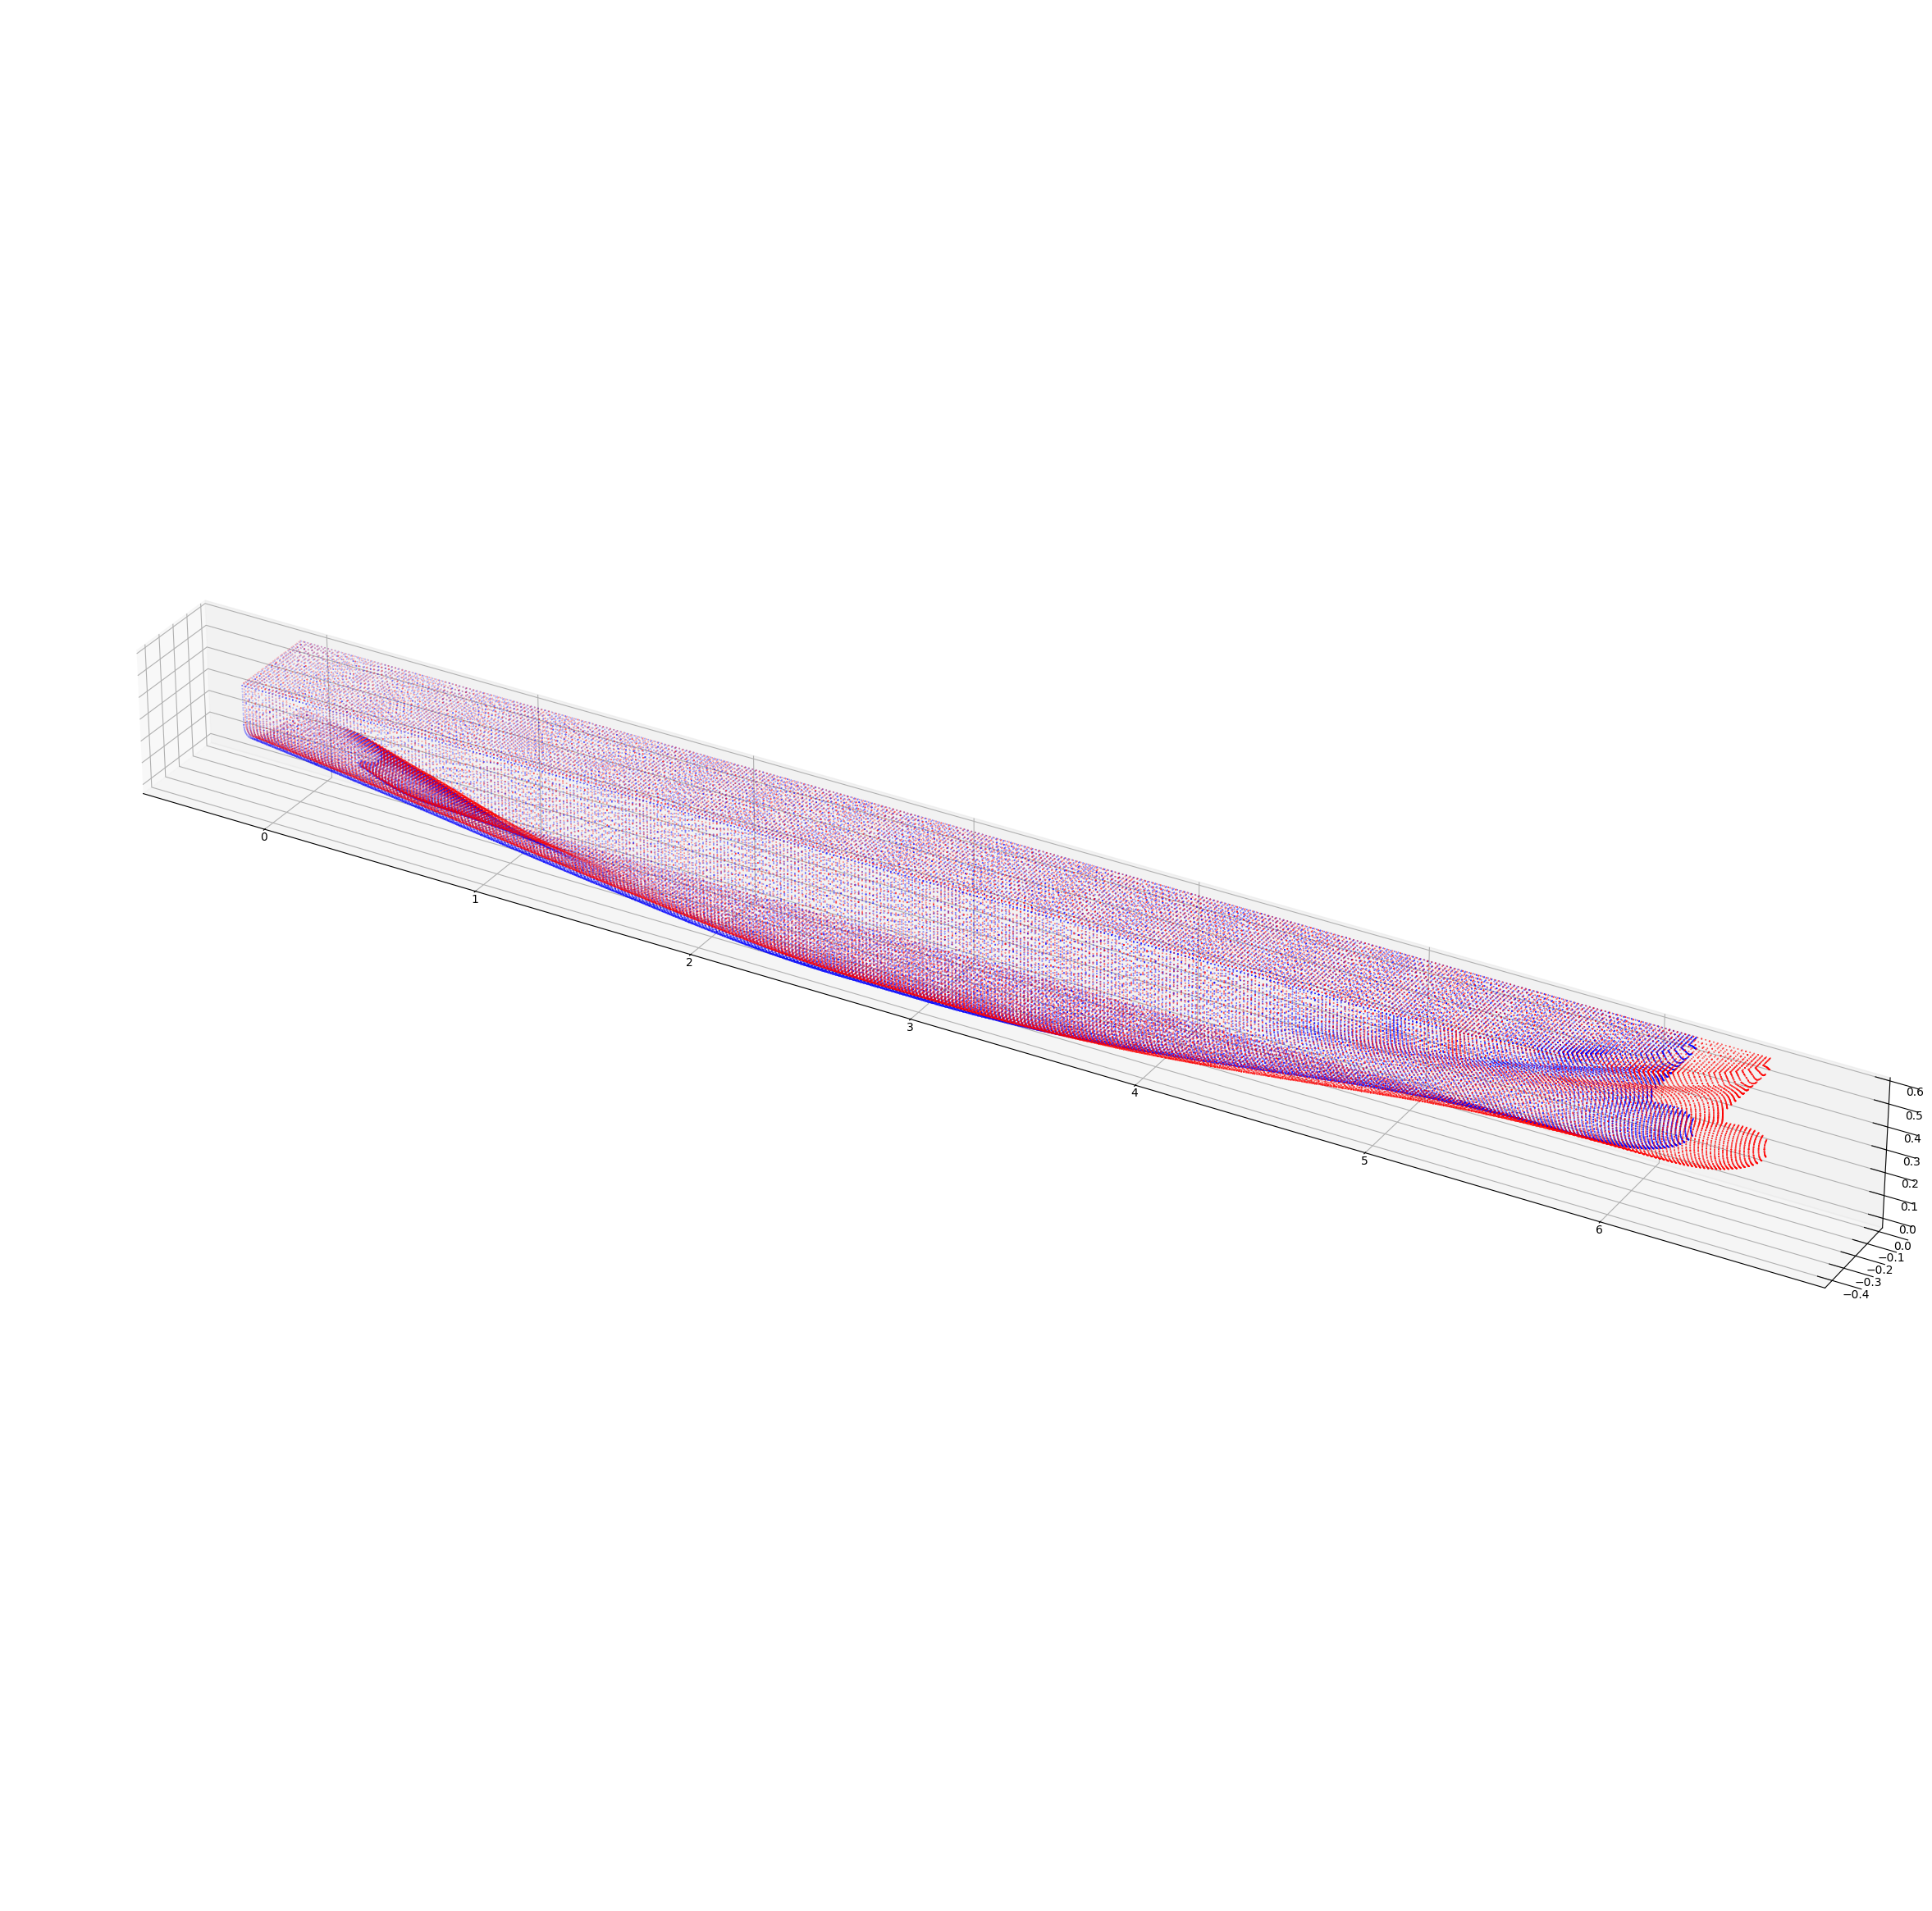

In [44]:

# combine the data

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')

# ax.view_init(elev=0, azim=0)

ax.scatter(x1, y1, z1, c='b', s=0.1)
ax.scatter(x2, y2, z2, c='r', s=0.1)
ax.set_aspect('equal')